<a href="https://colab.research.google.com/github/prachi1294/599-Team-1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import nltk
#nltk.download("gutenberg")
#from nltk.corpus import gutenberg
import requests
import re
from collections import defaultdict
from nltk import clean_html
from collections import Counter
import operator


from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [2]:
nlp = spacy.load('en')
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab


<IPython.core.display.Javascript object>

In [3]:
def read_books(url):
  r = requests.get(url)
  # What comes back includes headers and other HTTP stuff, get just the body of the response
  t = r.text
  return t


#save all the books
the_extra_ordinary_adv_lupin = 'https://www.gutenberg.org/files/6133/6133-0.txt'
arsene_lupin = 'https://www.gutenberg.org/cache/epub/4014/pg4014.txt'
lupin_vs_herlock_sholmes = 'https://www.gutenberg.org/files/40203/40203-0.txt'
the_hollow_needle = 'https://www.gutenberg.org/files/4017/4017-0.txt'
the_confession_of_lupin = 'https://www.gutenberg.org/cache/epub/28093/pg28093.txt'


#read all the books one by one

book1 = read_books(the_extra_ordinary_adv_lupin)
book2 = read_books(arsene_lupin)
book3 = read_books(lupin_vs_herlock_sholmes)
book4 = read_books(the_hollow_needle)
book5 = read_books(the_confession_of_lupin)




<IPython.core.display.Javascript object>

In [4]:
##my regex = (IX|IV|V?I{1,3}\.\s)([A-Z].*)(\W*[a-zA-Z])
## regex for selecting chapter name = (IX|IV|V|V?I{1,3})(\.\s[A-Z].*)
pattern = ("(IX|IV|V|V?I{1,3})(\.\s[A-Z].*)") #get the chapter name. Group 1 will get the chapter no followed by . and space. Group 2 will get chapter name
matches = []
matches = re.findall(pattern, book1)
print(matches)

<IPython.core.display.Javascript object>

[('I', '. The Arrest of ArsÃ¨ne Lupin\r'), ('II', '. ArsÃ¨ne Lupin in Prison\r'), ('III', '. The Escape of ArsÃ¨ne Lupin\r'), ('IV', '. The Mysterious Traveller\r'), ('V', '. The Queenâ\x80\x99s Necklace\r'), ('VI', '. The Seven of Hearts\r'), ('VII', '. Madame Imbertâ\x80\x99s Safe\r'), ('VIII', '. The Black Pearl\r'), ('IX', '. Sherlock Holmes Arrives Too Late\r')]


In [5]:
words_pattern = ("(?!\[?[0-9]+[\[\]]?)[A-Za-z]?[a-z][a-z\']*") #extract words from book and ignores numeric and capital letters
words = []
words = re.findall(words_pattern, book1)
print(words[:10])

<IPython.core.display.Javascript object>

['The', 'Project', 'Gutenberg', 'e', 'Book', 'of', 'The', 'Extraordinary', 'Adventures', 'of']


In [44]:
def sentence_devide(text): ##splitting up book 1 into sentences


  sentence_pattern = ""
  #"....."
  sentence_pattern = "(\\s+\"+[A-Za-z,:;'\"\\s]+[:.?!]\"(?=\\s))"
  #.....
  sentence_pattern = sentence_pattern+"|(\\s+[A-Za-z,:;'\\s]+[.?!](?=\\s))"
  #".....
  sentence_pattern = sentence_pattern+"|(\\s+\"+[A-Za-z,:;'\"\\s]+[:.?!](?=\\s))"
  # ....."
  sentence_pattern = sentence_pattern+"|(\\s+[A-Za-z,:;'\"\\s]+[:.?!]\"(?=\\s))"
  #words_pattern = ('[A-za-z0-9\']+')
  sentences = re.findall(sentence_pattern, book1)
  #print(sentences[:20])
  line_number=0
  sentence_result = []
  for sent in sentences:
    line_number=line_number+1
    print(line_number)
    for s in sent:
      if s:
        sent_sub=re.sub(r'[\r\n]+',' ',s)
        print(sent_sub)
        sentence_result.append(sent_sub)

  return sentence_result


#sentence_1_result = sentence_devide(book1)
#sentence_2_result = sentence_devide(book2)
#sentence_3_result = sentence_devide(book3)
#sentence_4_result = sentence_devide(book4)
#sentence_5_result = sentence_devide(book5)
#print(sentence_5_result)

<IPython.core.display.Javascript object>

In [7]:
from bs4 import BeautifulSoup
nltk.download("stopwords")
# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?','â\x80\x9ci', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '' ]



 # We most likely would like to remove html markup
def cleanHtml (html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    #we need to get rid of this: â\x80\x9ci
    #wn = re.sub('â\x80\x9ci', '\"', w)
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)


def get_word_frequency (text):
    
    # Now clean
    # remove html markup
    t = cleanHtml (text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),20)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        

<IPython.core.display.Javascript object>

In [9]:
##Frequency count from each book

read_text = (book1_text, err1) = get_word_frequency (book1)
(book2_text, err2) =  get_word_frequency (book2)
(book3_text, err3) =  get_word_frequency (book3)
(book4_text, err4) =  get_word_frequency (book4)
(book5_text, err5) =  get_word_frequency (book5)
print(book1_text)
print(book2_text)
print(book3_text)
print(book4_text)
print(book5_text)

<IPython.core.display.Javascript object>

[('day', 64), ('de', 67), ('room', 67), ('work', 70), ('upon', 70), ('us', 71), ('ganimard', 76), ('know', 77), ('mon', 86), ('project', 87), ('time', 91), ('could', 100), ('must', 107), ('man', 125), ('would', 138), ('two', 143), ('said', 210), ('one', 235), ('arsã¨ne', 259), ('lupin', 263)]
[('come', 129), ('dont', 143), ('victoire', 150), ('room', 151), ('well', 168), ('eyes', 172), ('came', 176), ('oh', 187), ('went', 188), ('yes', 201), ('sonia', 215), ('one', 223), ('germaine', 225), ('cried', 236), ('door', 246), ('formery', 254), ('lupin', 327), ('guerchard', 626), ('duke', 735), ('said', 1765)]
[('herlock', 89), ('project', 89), ('could', 95), ('see', 96), ('door', 99), ('mon', 105), ('time', 107), ('man', 113), ('must', 119), ('house', 134), ('would', 137), ('wilson', 139), ('two', 160), ('arsã¨ne', 175), ('ganimard', 183), ('monsieur', 185), ('one', 242), ('said', 286), ('lupin', 370), ('sholmes', 405)]
[('old', 82), ('upon', 83), ('could', 83), ('took', 85), ('project', 88)

<IPython.core.display.Javascript object>

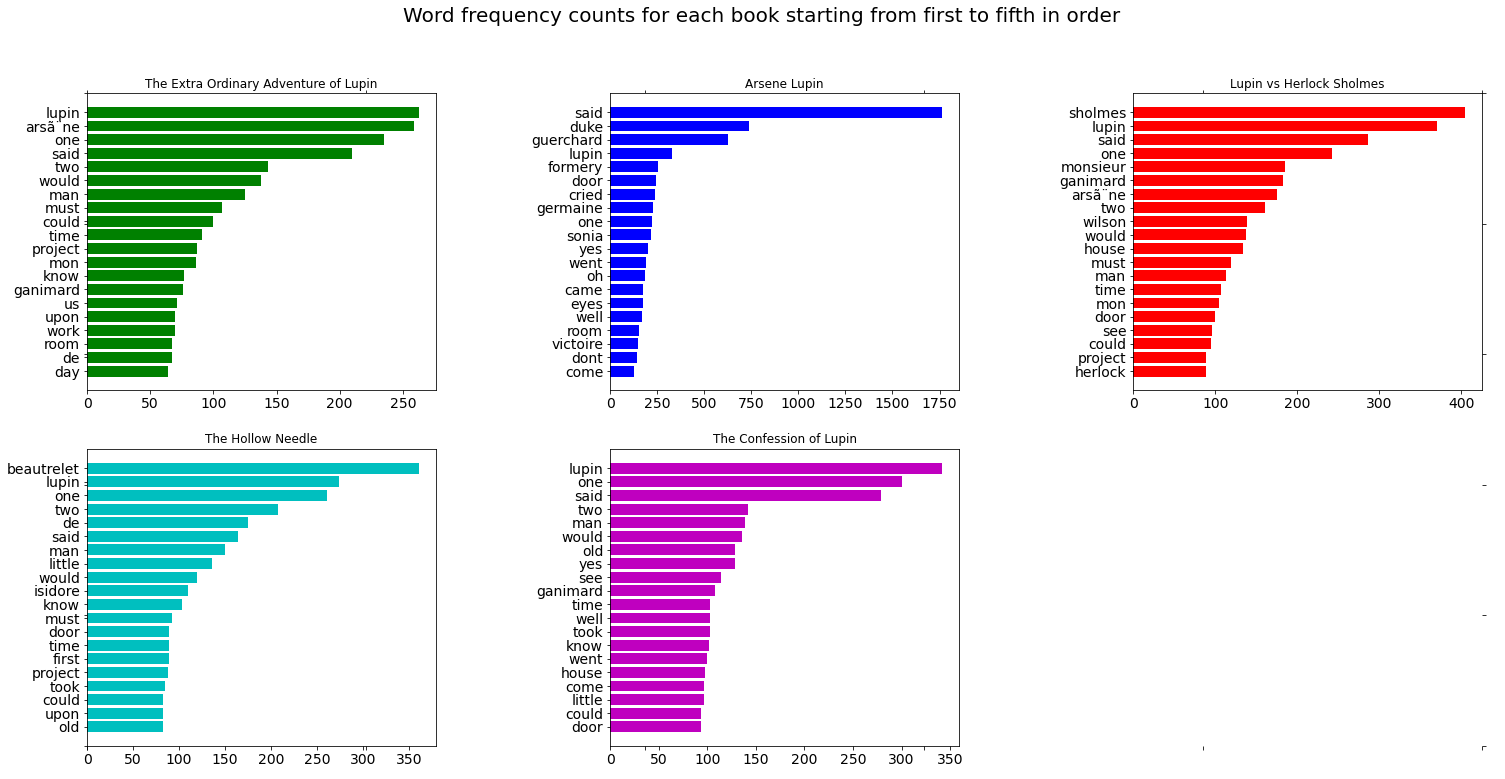

In [10]:
##read_books(arsene_lupin)
#book3 = read_books(lupin_vs_herlock_sholmes)
#book4 = read_books(the_hollow_needle)
#book5 = read_books(the_confession_of_lupin)

%matplotlib inline
def plot_frequency_all (book_1, book_2, book_3, book_4, book_5, title):
    f = plt.figure (figsize=(25, 12))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (231)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(book1_text)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    ax1.title.set_text('The Extra Ordinary Adventure of Lupin')
    pylab .yticks (pos, [ x [0] for x in book1_text ])
    ax1 .barh (range(len(book1_text)), [ x [1] for x in book1_text ], align='center', color='g')

    ax2 = f .add_subplot (232)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    ax2.title.set_text('Arsene Lupin')
    pos = np .arange (len(book2_text)) 
    pylab .yticks (pos, [ x [0] for x in book2_text ])
    ax2 .barh (range (len(book2_text)), [ x [1] for x in book2_text ], align='center', color='b')

    ax3 = f .add_subplot (233)
    ax3 .tick_params (axis='both', which='major', labelsize=14)
    ax3.title.set_text('Lupin vs Herlock Sholmes')
    pos = np .arange (len(book3_text)) 
    pylab .yticks (pos, [ x [0] for x in book3_text ])
    ax3 .barh (range (len(book3_text)), [ x [1] for x in book3_text ], align='center', color='r')

    ax4 = f .add_subplot (234)
    ax4 .tick_params (axis='both', which='major', labelsize=14)
    ax4.title.set_text('The Hollow Needle')
    pos = np .arange (len(book4_text)) 
    pylab .yticks (pos, [ x [0] for x in book4_text ])
    ax4 .barh (range (len(book4_text)), [ x [1] for x in book4_text ], align='center', color='c')

    ax5 = f .add_subplot (235)
    ax5 .tick_params (axis='both', which='major', labelsize=14)
    ax5.title.set_text('The Confession of Lupin')
    pos = np .arange (len(book5_text)) 
    pylab .yticks (pos, [ x [0] for x in book5_text ])
    ax5 .barh (range (len(book5_text)), [ x [1] for x in book5_text ], align='center', color='m')




plot_frequency_all (book1_text, book2_text, book3_text, book4_text, book5_text,'Word frequency counts for each book starting from first to fifth in order')

In [40]:
## find the characters
#find investiagtor name
book_1_characters = ['Ganimard', 'Daspry', 'Devanne','Velmont','Rozaine','Henriette','Floriani','Sherlock Holmes','Louis Lacombe','Baudru','Varin','Valorbe','Mon']
book_2_characters = ['Duke', 'Guerchard', 'Germaine','Sonia','M. Gournay-Martin','Firmin','Dieusy','Jean','Mademoiselle Kritchnoff','Irma','Jacques','Jeanne','Bernard','Marie','M. Charolais','Gournay-Martin']
book_3_characters = ['Wilson', 'Ganimard', 'Gerbois','Englishman','Clotilde','Bresson','Charles','Mlle','Suzanne','Baron','de Crozon']
book_4_characters = ['M. Filleul', 'Ganimard', 'ValmÃ','de Saint','Mlle','Isidore Beautrelet','Massiban','M. de Gesvres','M. Beautrelet']
book_5_characters = ['Ganimard', 'Dugrival', 'Mme','Gabriel','Jeanne','M. Dudouis','Goussot','Angélique','Mlle','Jove','Maître Valandier','Louise','Jeanniot','Farmer Goussot']

find_1_investigator = ['detective','investigating', 'investigator','officer','investigation','detective-service']

def find_detective(book_characters, find_investigator, sentence_result):
  for i in book_characters:
    for n in find_investigator:

      for s in sentence_result:
        match1 = re.search(i, s)
        match2 = re.search(n,s)
        if match1:
          if match2:
            print('\n'+s)
        else:
          continue

  

#book1_detective = find_detective(book_1_characters, find_1_investigator, sentence_1_result) ## Ganimard, Rozaine 
#book2_detective = find_detective(book_2_characters, find_2_investigator, sentence_2_result) ## none
#book3_detective = find_detective(book_3_characters, find_1_investigator, sentence_3_result) ## Ganimard
#book4_detective = find_detective(book_4_characters, find_1_investigator, sentence_4_result) ## Ganimard
book5_detective = find_detective(book_5_characters, find_1_investigator, sentence_5_result) ## Ganimard

book_name = ['The Extra Ordinary Adventure of Lupin','Arsene Lupin','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']
officers = ['Ganimard & Rozaine', 'none','Ganimard','Ganimard','Ganimard']
chap = ['Chapter','Chapter','Chapter','Chapter','Chapter']
sent = ['Sentence','Sentence','Sentence','Sentence','Sentence']

df = {'Book Name': book_name, 'Investigator Name': officers,'Chapter No.': chap,'Sentence No.': sent}
df_dict = pd.DataFrame(df)
df_dict

<IPython.core.display.Javascript object>


 the mysterious individual with whom Ganimard, our shrewdest detective, had been engaged in an implacable conflict amidst interesting and picturesque surroundings.

 Lupin better than Ganimard, the patient and astute detective?

 have always said: Ganimard is our best detective.

 The theory of an accomplice was thereupon adopted by the press and public, and also by Ganimard, the famous detective.

 An American officer, standing behind Ganimard, leaned forward and whispered in his ear.


,Book Name,Investigator Name,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,Ganimard & Rozaine,Chapter,Sentence
1,Arsene Lupin,none,Chapter,Sentence
2,Lupin vs Herlock Sholmes,Ganimard,Chapter,Sentence
3,The Hollow Needle,Ganimard,Chapter,Sentence
4,The Confession of Lupin,Ganimard,Chapter,Sentence


In [31]:
#function for crime mentioned

crimes = ['murder','shot', 'crime', 'assault','revolver']
#crime_occured = 'occurred'
def crime_mentoned(crimes, sentence_result):

  for c in crimes:
    for s in sentence_result:
      match1 = re.search(c, s)
      #match2 = re.search(crime_occured,s)
      if match1:
        #if match2:
        print('\n'+s)
      else:
        continue

#crime_1= crime_mentoned(crimes, sentence_1_result)
crime_2= crime_mentoned(crimes, sentence_2_result)
#crime_3= crime_mentoned(crimes, sentence_3_result)
#crime_4= crime_mentoned(crimes, sentence_4_result)
#crime_5= crime_mentoned(crimes, sentence_5_result)


book_name = ['The Extra Ordinary Adventure of Lupin','Arsene Lupin','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']
crime_mentioned = ['Murder', 'Murder','Murder','Murder','Murder']
chap = ['Chapter','Chapter','Chapter','Chapter','Chapter']
sent = ['Sentence','Sentence','Sentence','Sentence','Sentence']

df_c = {'Book Name': book_name, 'Crime': crime_mentioned,'Chapter No.': chap,'Sentence No.': sent}
df_dict_c = pd.DataFrame(df_c)
df_dict_c

<IPython.core.display.Javascript object>


 This time, it would not be a simple theft or a comparatively harmless assault; it would be a crime, a murder.

 prosecution must prove, beyond any reasonable doubt, that the prisoner committed the murder.

 In those forty minutes, involved as I was in a most dangerous plight, I calmly studied the scene of the murder and reached the conclusion that the crime must have been committed by one of the house servants.

 So I took his revolver and fired a shot in the air.

 Then I heard a pistol shot.

 The shot was fired close to me.

 He trembled with rage; his eyes were bloodshot.

 It shot forth from the central fluting of a column that supported the pediment of the bookcase.

 Lupin could commit a crime without being actually present.

 This time, it would not be a simple theft or a comparatively harmless assault; it would be a crime, a murder.

 A recital of the crimes that have been committed there would cause the stoutest heart to tremble.

 As an habitual reader of the newspapers, h

,Book Name,Crime,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,Murder,Chapter,Sentence
1,Arsene Lupin,Murder,Chapter,Sentence
2,Lupin vs Herlock Sholmes,Murder,Chapter,Sentence
3,The Hollow Needle,Murder,Chapter,Sentence
4,The Confession of Lupin,Murder,Chapter,Sentence


In [32]:
#create word cloud of chacters from each book
from wordcloud import WordCloud
characters_1 = {'Lupin': 233, 'Ganimard': 61, 'Daspry': 39, 'Devanne': 31, 'Velmont': 20, 'Rozaine': 17, 'Henriette': 15, 'Floriani': 15, 'Sherlock Holmes': 14, 'Louis Lacombe': 12, 'Baudru': 11, 'Varin': 38}
characters_2 = {'Lupin': 313,'Duke': 570, 'Guerchard': 541, 'Germaine': 228,'Sonia': 189,'M. Gournay-Martin': 62,'Firmin': 59,'Dieusy': 33,'Jean': 30,'Mademoiselle Kritchnoff': 29,'Irma': 27,'Jacques': 25,'Jeanne': 24,'Bernard': 22,'Marie': 21,'M. Charolais': 20,'Gournay-Martin': 18}
characters_3 = {'Lupin': 346,'Wilson':140, 'Ganimard': 139, 'Gerbois': 61,'Englishman': 46,'Clotilde': 20,'Bresson': 19,'Charles': 16,'Mlle': 15,'Suzanne': 14,'Baron': 11,'de Crozon': 11}
characters_4 = {'Beautrelet': 251,'Lupin': 259,'M. Filleul': 52, 'Ganimard': 64, 'ValmÃ': 35,'de Saint': 34,'Mlle': 33,'Isidore Beautrelet': 27,'Massiban': 27,'M. de Gesvres': 15,'M. Beautrelet': 14} #Beautrelet is organization but included in this character list since so many names are related to this org.
characters_5 = {'Lupin': 343,'Ganimard': 107, 'Dugrival': 32, 'Mme': 32,'Gabriel': 31,'Yvonne': 31,'Jeanne': 27,'M. Dudouis': 23,'Goussot': 22,'Angélique': 18,'Mlle': 16,'Jove': 15,'Maître Valandier': 15,'Louise': 14,'Jeanniot': 13,'Farmer Goussot': 13}


print(characters_1)
print(characters_2)
print(characters_3)
print(characters_4)
print(characters_5)

<IPython.core.display.Javascript object>

{'Lupin': 233, 'Ganimard': 61, 'Daspry': 39, 'Devanne': 31, 'Velmont': 20, 'Rozaine': 17, 'Henriette': 15, 'Floriani': 15, 'Sherlock Holmes': 14, 'Louis Lacombe': 12, 'Baudru': 11, 'Varin': 38}
{'Lupin': 313, 'Duke': 570, 'Guerchard': 541, 'Germaine': 228, 'Sonia': 189, 'M. Gournay-Martin': 62, 'Firmin': 59, 'Dieusy': 33, 'Jean': 30, 'Mademoiselle Kritchnoff': 29, 'Irma': 27, 'Jacques': 25, 'Jeanne': 24, 'Bernard': 22, 'Marie': 21, 'M. Charolais': 20, 'Gournay-Martin': 18}
{'Lupin': 346, 'Wilson': 140, 'Ganimard': 139, 'Gerbois': 61, 'Englishman': 46, 'Clotilde': 20, 'Bresson': 19, 'Charles': 16, 'Mlle': 15, 'Suzanne': 14, 'Baron': 11, 'de Crozon': 11}
{'Beautrelet': 251, 'Lupin': 259, 'M. Filleul': 52, 'Ganimard': 64, 'ValmÃ': 35, 'de Saint': 34, 'Mlle': 33, 'Isidore Beautrelet': 27, 'Massiban': 27, 'M. de Gesvres': 15, 'M. Beautrelet': 14}
{'Lupin': 343, 'Ganimard': 107, 'Dugrival': 32, 'Mme': 32, 'Gabriel': 31, 'Yvonne': 31, 'Jeanne': 27, 'M. Dudouis': 23, 'Goussot': 22, 'Angélique'

In [33]:
#word cloud function for all main characters in each book

def word_cloud(char, title):
  f = plt.figure (figsize=(10, 10))
  f.suptitle(title, fontsize=20)
  word_cloud = WordCloud(collocations = False,background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(char)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

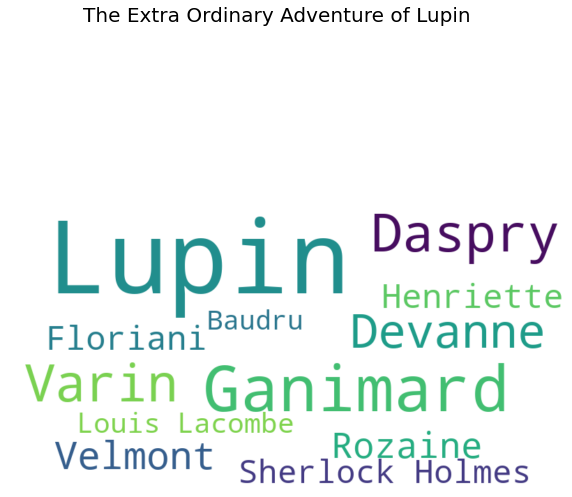

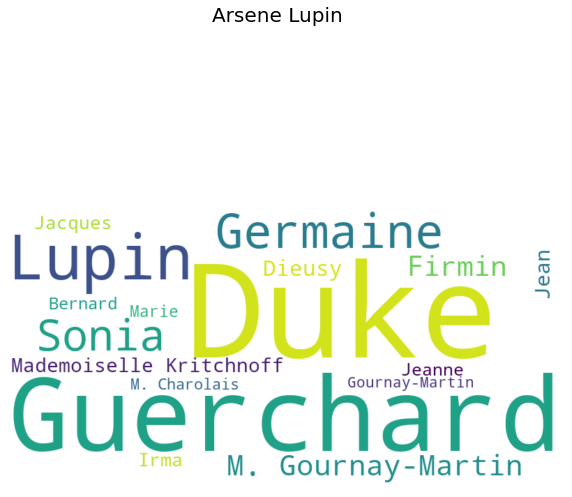

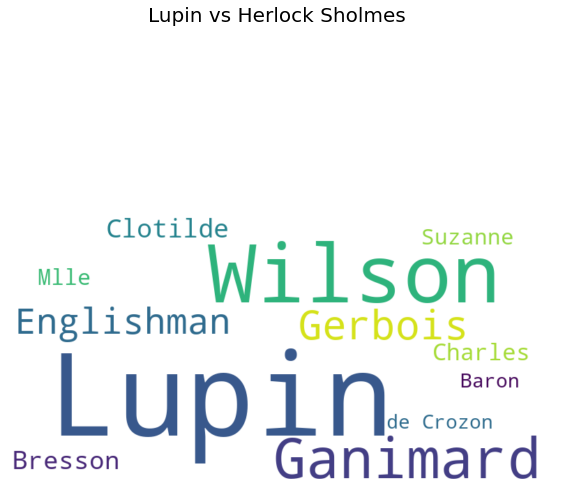

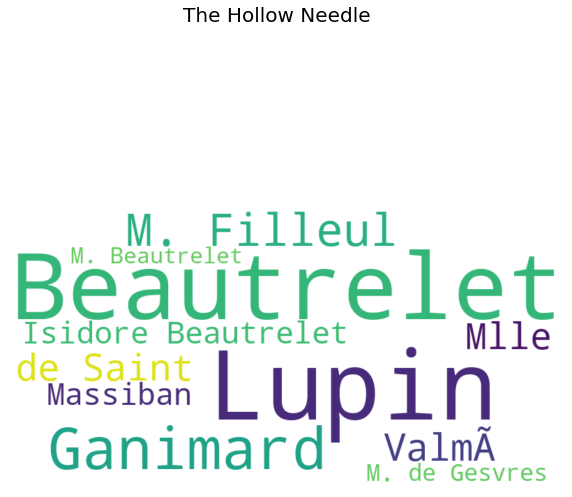

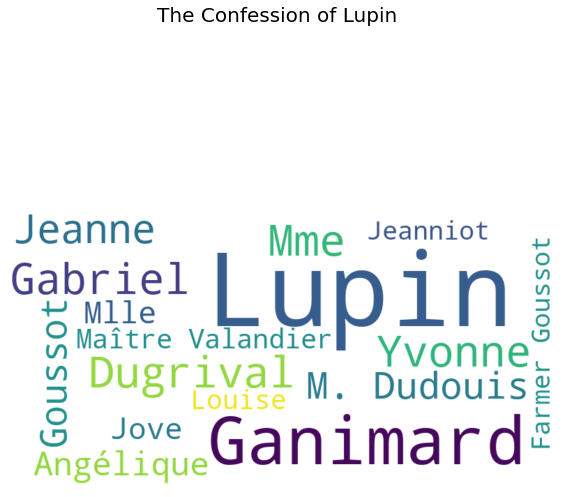

In [34]:
plot1 = word_cloud(characters_1, 'The Extra Ordinary Adventure of Lupin')
plot2 = word_cloud(characters_2, 'Arsene Lupin')
plot3 = word_cloud(characters_3, 'Lupin vs Herlock Sholmes')
plot4 = word_cloud(characters_4, 'The Hollow Needle')
plot5 = word_cloud(characters_5, 'The Confession of Lupin')


In [21]:
#find out each character to find more suspects

suspects = ['Daspry', 'Devanne','Velmont','Rozaine','Henriette','Floriani','Sherlock Holmes','Louis Lacombe','Baudru' 'Valorbe','Mon','Varin']
suspect_words = ['suspect','inquiries','inquiry','doubt','strange','pain']

suspect_person = 'Henriette'

for p in suspect_words:
  for sus in suspects:

    for s in sentence_1_result:
      match_sus = re.search(sus, s)
      match2 = re.search(p, s)
      if match_sus:
        if match2:

          print('\n'+s)
        else:
          continue

#suspect 1 is Henriette and she died later and mystery remained unsolved

<IPython.core.display.Javascript object>


 do not suppose you suspect Henriette.

 The inquiries especially concerned Henriette, for, in spite of everything, they always turned in her direction.

 And, strange to relate, it was upon her former schoolmate, Henriette, that the countess vented her spleen.

 Daspry seized his arm so forcibly, that Varin uttered a cry of pain.

 Daspry seized his arm so forcibly, that Varin uttered a cry of pain.


In [43]:
#lets check each person one by one see how they are related

person ='Ganimard' #'M. Dudouis' #'Varin' #'Daspry'
for s in sentence_5_result:
  match_sus = re.search(person, s)
  if match_sus:
    print('\n'+s)
  else:
    continue

#Daspry doesnt look like a suspect

<IPython.core.display.Javascript object>


 the mysterious individual with whom Ganimard, our shrewdest detective, had been engaged in an implacable conflict amidst interesting and picturesque surroundings.

 Ganimard was here!

 Leaning on his umbrella, with an air of careless indifference, Ganimard appeared to be paying no attention to the crowd that was hurrying down the gangway.

 think it would be very interesting to have Ganimard and Rozaine in the same picture.

 An American officer, standing behind Ganimard, leaned forward and whispered in his ear.

 But we had not taken ten steps when Ganimard barred our passage.

 I pledge my oath that, at that solemn moment, when I was in the grasp of Ganimard and his two assistants, I was perfectly indifferent to everything, to my arrest, the hostility of the people, everything except this one question: what will Miss Nelly do with the things I had confided to her?

 Ganimard!

 Lupin better than Ganimard, the patient and astute detective?

 Five minutes later, the baron approached